In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer 
from textblob import TextBlob 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy.stats import skew, boxcox, randint, uniform
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor # pip install xgboost
from lightgbm import LGBMRegressor # pip install lightgbm
from catboost import CatBoostRegressor # pip install catboost
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
#pip install catboost

In [3]:
 ##                          Data Understanding and Preprocessing
df = pd.read_csv("C:/Users/USER/Downloads/Insurance Premium Prediction Dataset.csv")
df.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,56.0,Male,99990.0,Married,1.0,Master's,NaN,31.074627,Urban,Comprehensive,NaN,13,320.0,5,308.0,2022-12-10 15:21:39.078837,Poor,Yes,Daily,Condo
1,46.0,Male,2867.0,Single,1.0,Bachelor's,NaN,50.271335,Urban,Comprehensive,NaN,3,694.0,4,517.0,2023-01-31 15:21:39.078837,Good,Yes,Monthly,House
2,32.0,Female,30154.0,Divorced,3.0,Bachelor's,NaN,14.714909,Suburban,Comprehensive,2.0,16,652.0,8,849.0,2023-11-26 15:21:39.078837,Poor,No,Monthly,House
3,60.0,Female,48371.0,Divorced,0.0,PhD,Self-Employed,25.346926,Rural,Comprehensive,1.0,11,330.0,7,927.0,2023-02-27 15:21:39.078837,Poor,No,Rarely,Condo
4,25.0,Female,54174.0,Divorced,0.0,High School,Self-Employed,6.659499,Urban,Comprehensive,NaN,9,NaN,8,303.0,2020-11-25 15:21:39.078837,Poor,No,Rarely,Condo


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278860 entries, 0 to 278859
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   274175 non-null  float64
 1   Gender                278860 non-null  object 
 2   Annual Income         264905 non-null  float64
 3   Marital Status        273841 non-null  object 
 4   Number of Dependents  250974 non-null  float64
 5   Education Level       278860 non-null  object 
 6   Occupation            197572 non-null  object 
 7   Health Score          268263 non-null  float64
 8   Location              278860 non-null  object 
 9   Policy Type           278860 non-null  object 
 10  Previous Claims       197572 non-null  float64
 11  Vehicle Age           278860 non-null  int64  
 12  Credit Score          250974 non-null  float64
 13  Insurance Duration    278860 non-null  int64  
 14  Premium Amount        277019 non-null  float64
 15  

In [5]:
df.shape

(278860, 20)

In [6]:
df.isnull().sum()

Age                      4685
Gender                      0
Annual Income           13955
Marital Status           5019
Number of Dependents    27886
Education Level             0
Occupation              81288
Health Score            10597
Location                    0
Policy Type                 0
Previous Claims         81288
Vehicle Age                 0
Credit Score            27886
Insurance Duration          0
Premium Amount           1841
Policy Start Date           0
Customer Feedback       18349
Smoking Status              0
Exercise Frequency          0
Property Type               0
dtype: int64

In [7]:
#Missing Values Percentage
print((df.isnull().sum() / len(df)) * 100)

Age                      1.680055
Gender                   0.000000
Annual Income            5.004303
Marital Status           1.799828
Number of Dependents    10.000000
Education Level          0.000000
Occupation              29.150111
Health Score             3.800115
Location                 0.000000
Policy Type              0.000000
Previous Claims         29.150111
Vehicle Age              0.000000
Credit Score            10.000000
Insurance Duration       0.000000
Premium Amount           0.660188
Policy Start Date        0.000000
Customer Feedback        6.580004
Smoking Status           0.000000
Exercise Frequency       0.000000
Property Type            0.000000
dtype: float64


In [8]:
# numerical columns
df.select_dtypes("number").isnull().sum()

Age                      4685
Annual Income           13955
Number of Dependents    27886
Health Score            10597
Previous Claims         81288
Vehicle Age                 0
Credit Score            27886
Insurance Duration          0
Premium Amount           1841
dtype: int64

In [9]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print(f"\nIdentified numerical columns: {numerical_cols}")


Identified numerical columns: ['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Premium Amount']


In [10]:
df_median = df.copy()

# Fill missing values in the specified numerical columns with their respective medians
for col in numerical_cols:
    df_median[col] = df_median[col].fillna(df_median[col].median())

print("\nDataFrame after filling with median:")
print(df_median)
print("\nMissing values after filling with median:")
print(df_median.isnull().sum())


DataFrame after filling with median:
         Age  Gender  Annual Income Marital Status  Number of Dependents  \
0       56.0    Male        99990.0        Married                   1.0   
1       46.0    Male         2867.0         Single                   1.0   
2       32.0  Female        30154.0       Divorced                   3.0   
3       60.0  Female        48371.0       Divorced                   0.0   
4       25.0  Female        54174.0       Divorced                   0.0   
...      ...     ...            ...            ...                   ...   
278855  53.0    Male        22594.0       Divorced                   4.0   
278856  19.0  Female        32191.0       Divorced                   4.0   
278857  45.0  Female          557.0         Single                   1.0   
278858  60.0    Male         4064.0         Single                   4.0   
278859  50.0  Female        66056.0       Divorced                   1.0   

       Education Level     Occupation  Health Sco

In [11]:
# categorical columns
df.select_dtypes("object").isnull().sum()


Gender                    0
Marital Status         5019
Education Level           0
Occupation            81288
Location                  0
Policy Type               0
Policy Start Date         0
Customer Feedback     18349
Smoking Status            0
Exercise Frequency        0
Property Type             0
dtype: int64

In [12]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"\nIdentified categorical columns: {categorical_cols}")


Identified categorical columns: ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Policy Start Date', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']


In [13]:
df_skl = df_median.copy()

# Create an imputer with the 'most_frequent' strategy
imputer_mode = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the selected categorical columns
df_skl[categorical_cols] = imputer_mode.fit_transform(df_skl[categorical_cols])

print("\nDataFrame after SimpleImputer (most_frequent):")
print(df_skl)
print("\nMissing values after SimpleImputer (most_frequent):")
print(df_skl.isnull().sum())


DataFrame after SimpleImputer (most_frequent):
         Age  Gender  Annual Income Marital Status  Number of Dependents  \
0       56.0    Male        99990.0        Married                   1.0   
1       46.0    Male         2867.0         Single                   1.0   
2       32.0  Female        30154.0       Divorced                   3.0   
3       60.0  Female        48371.0       Divorced                   0.0   
4       25.0  Female        54174.0       Divorced                   0.0   
...      ...     ...            ...            ...                   ...   
278855  53.0    Male        22594.0       Divorced                   4.0   
278856  19.0  Female        32191.0       Divorced                   4.0   
278857  45.0  Female          557.0         Single                   1.0   
278858  60.0    Male         4064.0         Single                   4.0   
278859  50.0  Female        66056.0       Divorced                   1.0   

       Education Level     Occupation  

In [14]:
#Descriptive Statistics for numerical columns
df_skl.select_dtypes("number").describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,278860.000000,278860.000000,278860.000000,278860.000000,278860.000000,278860.000000,278860.000000,278860.000000,278860.000000
mean,41.020422,41593.755124,1.998243,28.503232,0.998666,9.520283,574.425845,5.007764,964.282561
std,13.435379,34613.600087,1.339837,15.665212,0.842393,5.767915,150.643445,2.581349,906.677489
min,18.000000,0.000000,0.000000,0.035436,0.000000,0.000000,300.000000,1.000000,0.000000
25%,30.000000,14412.000000,1.000000,16.553757,0.000000,5.000000,452.000000,3.000000,288.000000
50%,41.000000,32191.000000,2.000000,26.451244,1.000000,10.000000,575.000000,5.000000,688.000000
75%,53.000000,60028.750000,3.000000,38.362743,1.000000,15.000000,697.000000,7.000000,1360.000000
max,64.000000,149997.000000,4.000000,93.876090,9.000000,19.000000,849.000000,9.000000,4999.000000


In [15]:
# Convert 'Policy Start Date' to datetime
df_skl['Policy Start Date'] = pd.to_datetime(df_skl['Policy Start Date'], errors='coerce')
df_skl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278860 entries, 0 to 278859
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Age                   278860 non-null  float64       
 1   Gender                278860 non-null  object        
 2   Annual Income         278860 non-null  float64       
 3   Marital Status        278860 non-null  object        
 4   Number of Dependents  278860 non-null  float64       
 5   Education Level       278860 non-null  object        
 6   Occupation            278860 non-null  object        
 7   Health Score          278860 non-null  float64       
 8   Location              278860 non-null  object        
 9   Policy Type           278860 non-null  object        
 10  Previous Claims       278860 non-null  float64       
 11  Vehicle Age           278860 non-null  int64         
 12  Credit Score          278860 non-null  float64       
 13 

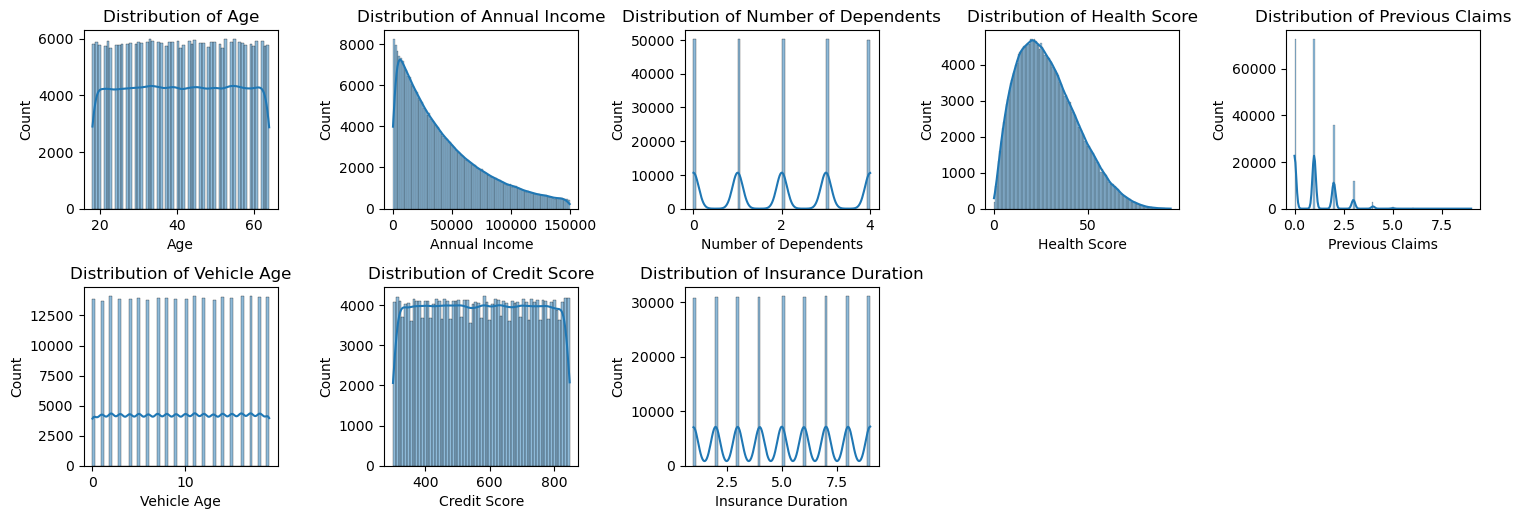

In [16]:
# Identify numerical columns for skewness check (excluding the target variable for now)
numerical_cols = df_skl.select_dtypes(include=np.number).columns.tolist()
if 'Premium Amount' in numerical_cols:
    numerical_cols.remove('Premium Amount')

# Plot distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 5, i + 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [17]:
# Check for positive skewness
skewed_features = df_skl[numerical_cols].apply(lambda x: skew(x.dropna()))
print("\nSkewness of Numerical Features:")
print(skewed_features[skewed_features > 0.75]) # Threshold for high skewness


Skewness of Numerical Features:
Annual Income      1.061449
Previous Claims    1.204916
dtype: float64


In [18]:
# Check for negative skewness
skewed_features = df_skl[numerical_cols].apply(lambda x: skew(x.dropna()))
print("\nSkewness of Numerical Features:")
print(skewed_features[skewed_features <-0.75]) # Threshold for high skewness


Skewness of Numerical Features:
Series([], dtype: float64)


In [19]:
# Apply transformation (example: log transformation for highly skewed positive data)
# For instance, if 'Annual Income' is highly skewed
if 'Annual Income' in df_skl.columns and skew(df_skl['Annual Income'].dropna()) > 0.75:
    df_skl['Annual Income Log'] = np.log1p(df_skl['Annual Income']) # log1p handles zero values
    df_skl.drop('Annual Income', axis=1, inplace=True)

In [20]:
if 'Previous Claims' in df_skl.columns and skew(df_skl['Previous Claims'].dropna()) > 0.75:
    df_skl['Previous Claims Log'] = np.log1p(df_skl['Previous Claims']) # log1p handles zero values
    df_skl.drop('Previous Claims', axis=1, inplace=True)

In [21]:
df_skl.isnull().sum()

Age                     0
Gender                  0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Premium Amount          0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Annual Income Log       0
Previous Claims Log     0
dtype: int64

In [22]:
df_skl.columns

Index(['Age', 'Gender', 'Marital Status', 'Number of Dependents',
       'Education Level', 'Occupation', 'Health Score', 'Location',
       'Policy Type', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Premium Amount', 'Policy Start Date', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type',
       'Annual Income Log', 'Previous Claims Log'],
      dtype='object')

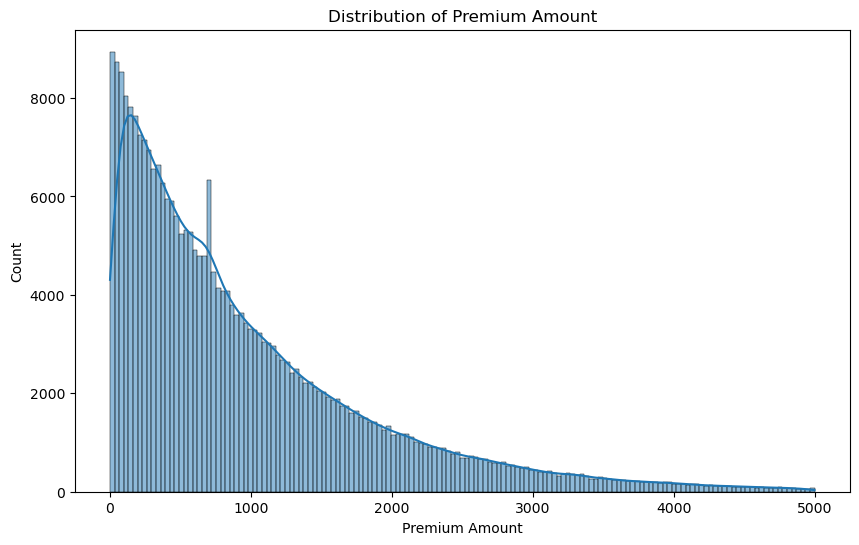

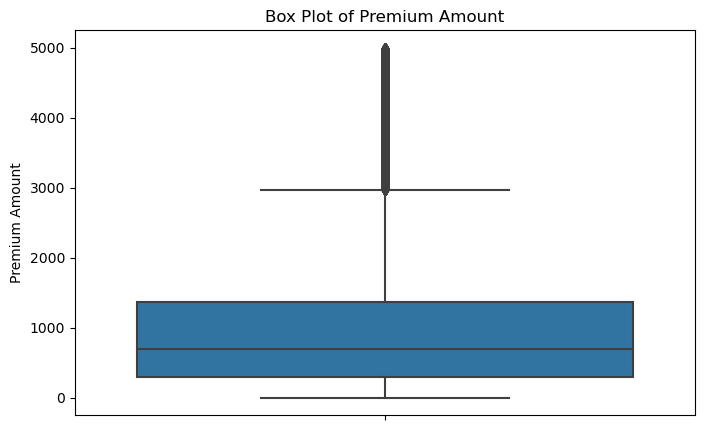

In [23]:
##                         Exploratory Data Analysis (EDA)

# Univariate Analysis of Premium Amount
plt.figure(figsize=(10, 6))
sns.histplot(df_skl['Premium Amount'], kde=True)
plt.title('Distribution of Premium Amount')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(y=df_skl['Premium Amount'])
plt.title('Box Plot of Premium Amount')
plt.show()

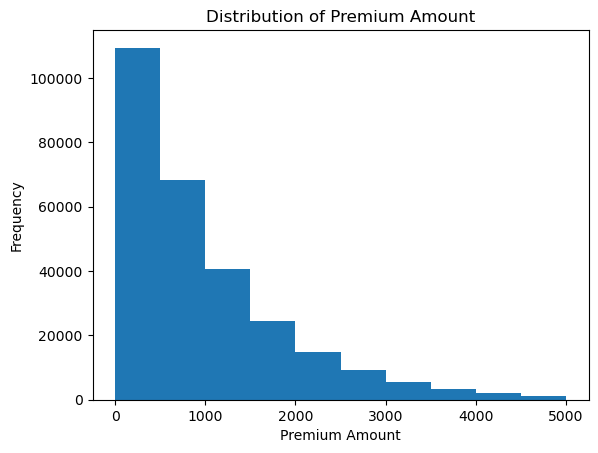

In [24]:
df_skl['Premium Amount'].plot(kind='hist')
plt.xlabel('Premium Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Premium Amount')
plt.show()

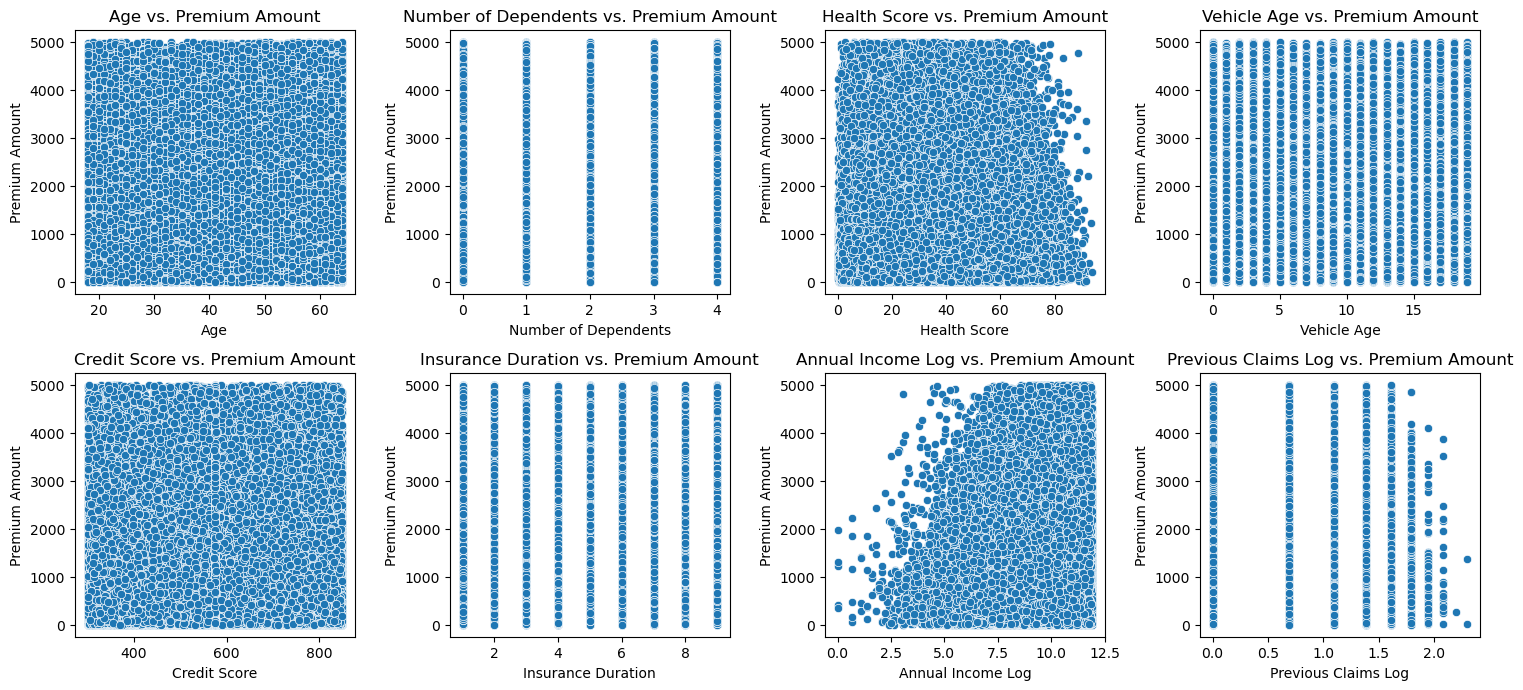

In [25]:
# Bivariate Analysis: Premium Amount vs. Numerical Features
numerical_features_for_corr = df_skl.select_dtypes(include=np.number).columns.tolist()
if 'Premium Amount' in numerical_features_for_corr:
    numerical_features_for_corr.remove('Premium Amount')

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features_for_corr):
    plt.subplot(3, 4, i + 1)
    sns.scatterplot(x=df_skl[col], y=df_skl['Premium Amount'])
    plt.title(f'{col} vs. Premium Amount')
plt.tight_layout()
plt.show()

In [26]:
#Correlation
df_skl[numerical_features_for_corr + ['Premium Amount']].corr()

,Age,Number of Dependents,Health Score,Vehicle Age,Credit Score,Insurance Duration,Annual Income Log,Previous Claims Log,Premium Amount
Age,1.000000,0.000059,0.001695,0.000892,0.000783,0.000198,0.000747,-0.000774,0.001825
Number of Dependents,0.000059,1.000000,0.002384,0.001880,-0.001976,-0.001075,0.002470,-0.001174,0.000242
Health Score,0.001695,0.002384,1.000000,-0.002257,0.001361,0.001165,0.001512,0.003229,0.000838
Vehicle Age,0.000892,0.001880,-0.002257,1.000000,-0.000752,0.000218,0.000547,0.000490,0.000393
Credit Score,0.000783,-0.001976,0.001361,-0.000752,1.000000,-0.000994,-0.002591,-0.000671,0.004837
Insurance Duration,0.000198,-0.001075,0.001165,0.000218,-0.000994,1.000000,-0.000749,-0.002116,0.004454
Annual Income Log,0.000747,0.002470,0.001512,0.000547,-0.002591,-0.000749,1.000000,-0.002698,-0.001296
Previous Claims Log,-0.000774,-0.001174,0.003229,0.000490,-0.000671,-0.002116,-0.002698,1.000000,0.000269
Premium Amount,0.001825,0.000242,0.000838,0.000393,0.004837,0.004454,-0.001296,0.000269,1.000000


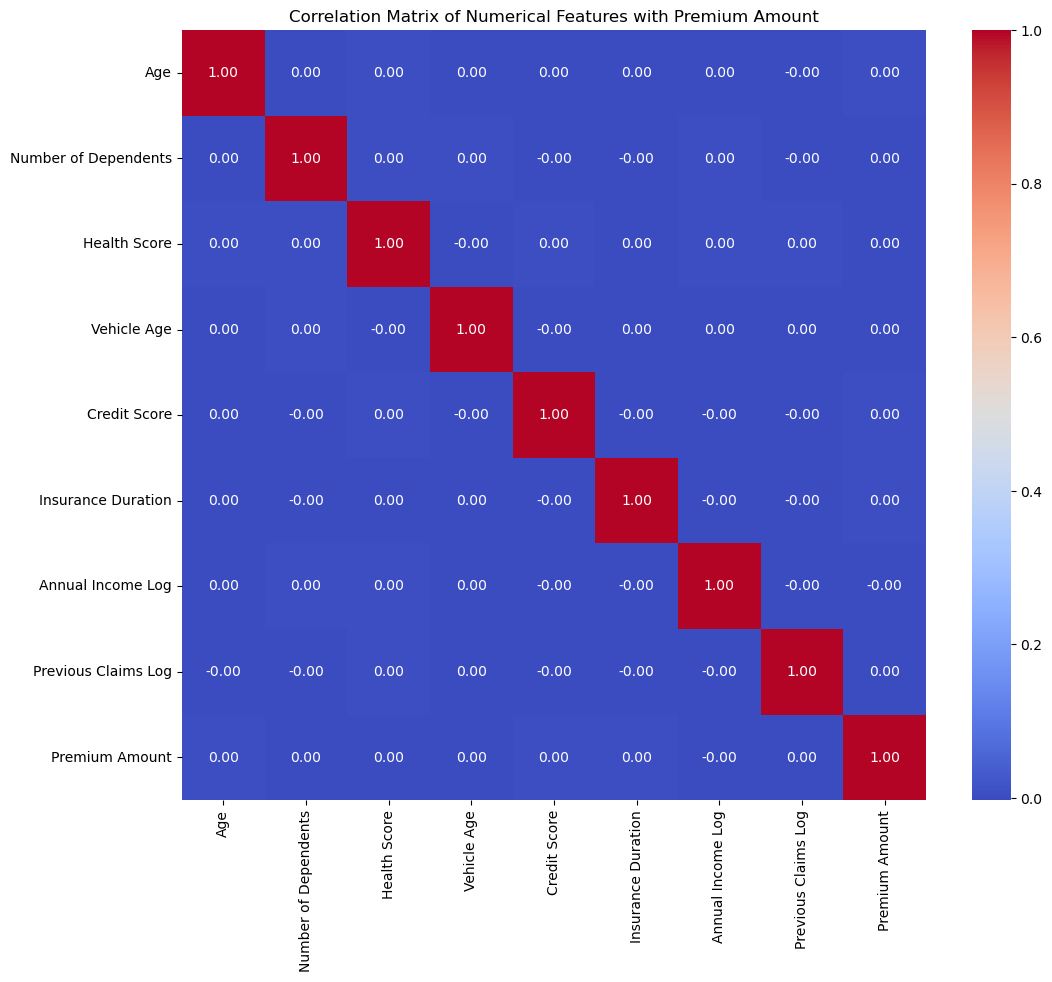

In [27]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df_skl[numerical_features_for_corr + ['Premium Amount']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features with Premium Amount')
plt.show()

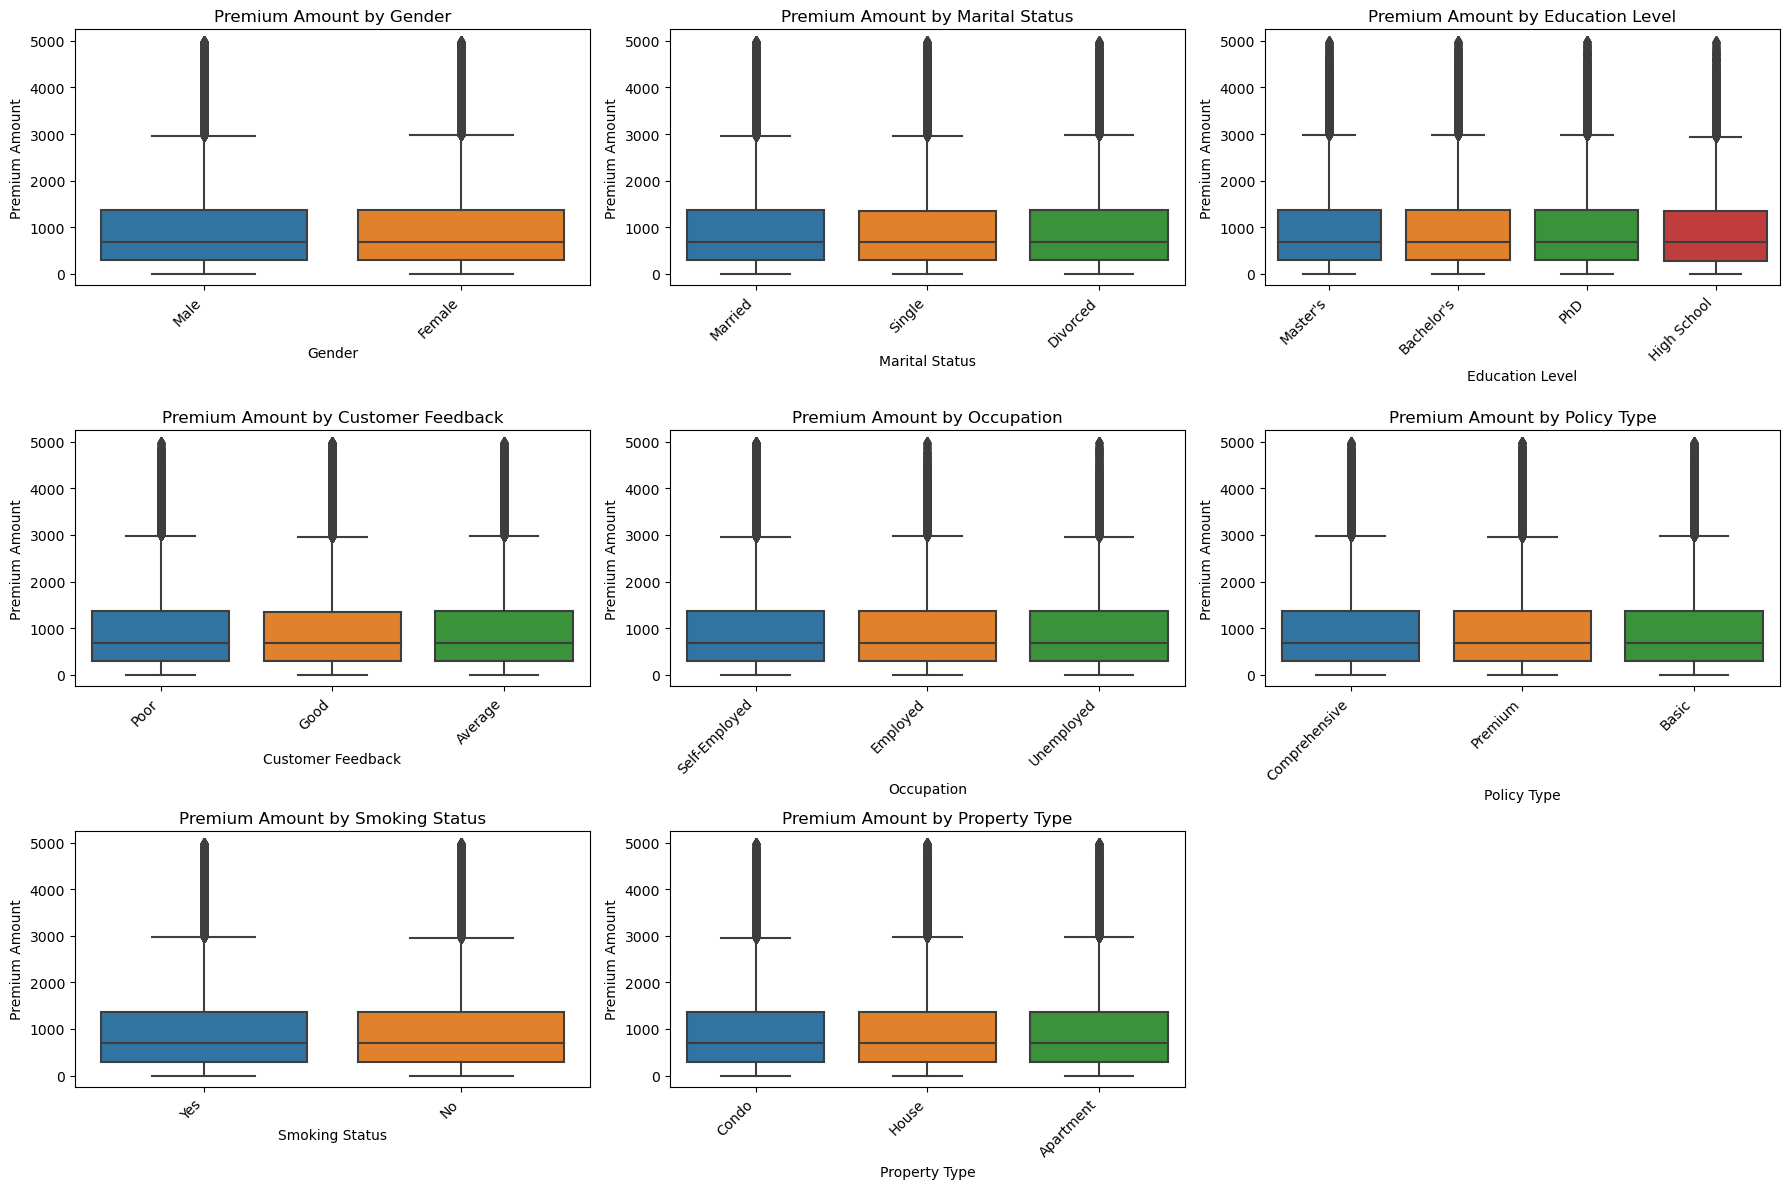

In [28]:
# Bivariate Analysis: Premium Amount vs. Categorical Features
categorical_cols = df_skl.select_dtypes(include='object').columns.tolist()
# Add 'Gender', 'Marital Status', 'Education Level', 'Occupation', 'Policy Type', 'Smoking Status', 'Property Type'
# 'Customer Feedback' if it's too high cardinality or requires NLP first
categorical_for_premium = ['Gender', 'Marital Status', 'Education Level', 'Customer Feedback',
                           'Occupation', 'Policy Type', 'Smoking Status', 'Property Type'] # Adjust based on your data

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_for_premium):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df_skl[col], y=df_skl['Premium Amount'])
    plt.title(f'Premium Amount by {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


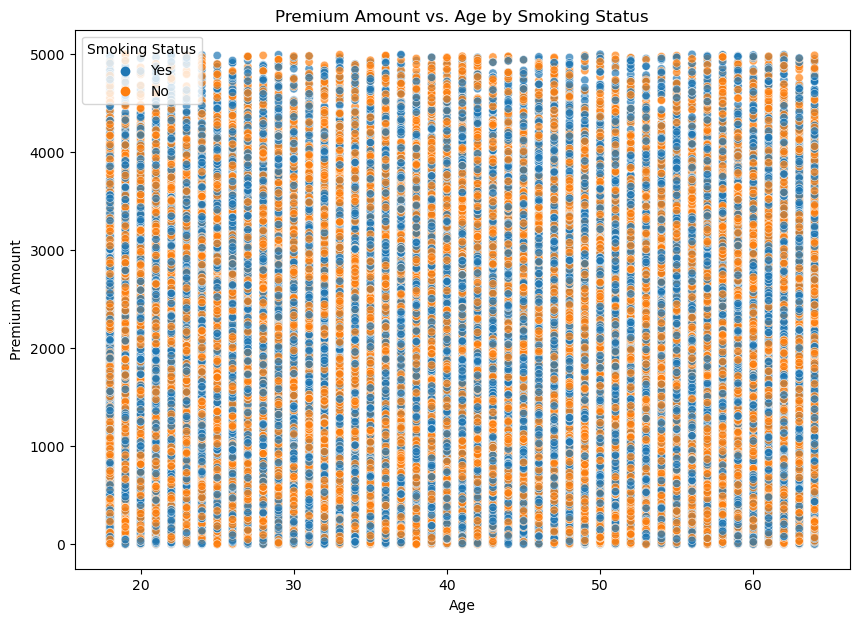

In [29]:
# Multivariate Analysis Example: Premium Amount vs. Age, colored by Smoking Status
if 'Age' in df_skl.columns and 'Smoking Status' in df_skl.columns:
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=df_skl['Age'], y=df_skl['Premium Amount'], hue=df_skl['Smoking Status'], alpha=0.7)
    plt.title('Premium Amount vs. Age by Smoking Status')
    plt.show()

In [30]:
# Multivariate Analysis Example: Premium Amount vs. Gender, and Occupation
# --- Grouping by 'Gender' and 'Occupation' ---
print("--- Premium Amount by Gender and Occupation ---")
premium_by_gender_occupation = df.groupby(['Gender', 'Occupation'])['Premium Amount'].agg(
    mean_premium='mean',
    median_premium='median',
    min_premium='min',
    max_premium='max',
    count='count'
).sort_values(by='mean_premium', ascending=False).reset_index() # Sort to see highest/lowest premiums easily

print(premium_by_gender_occupation)


--- Premium Amount by Gender and Occupation ---
   Gender     Occupation  mean_premium  median_premium  min_premium  \
0  Female  Self-Employed    968.094472           688.0          0.0   
1  Female       Employed    968.070944           692.0          0.0   
2    Male     Unemployed    967.644408           688.0          0.0   
3  Female     Unemployed    966.446780           688.0          0.0   
4    Male       Employed    964.318348           694.0          0.0   
5    Male  Self-Employed    963.615001           688.0          0.0   

   max_premium  count  
0       4980.0  32814  
1       4997.0  32561  
2       4993.0  32751  
3       4996.0  32582  
4       4997.0  32898  
5       4999.0  32665  


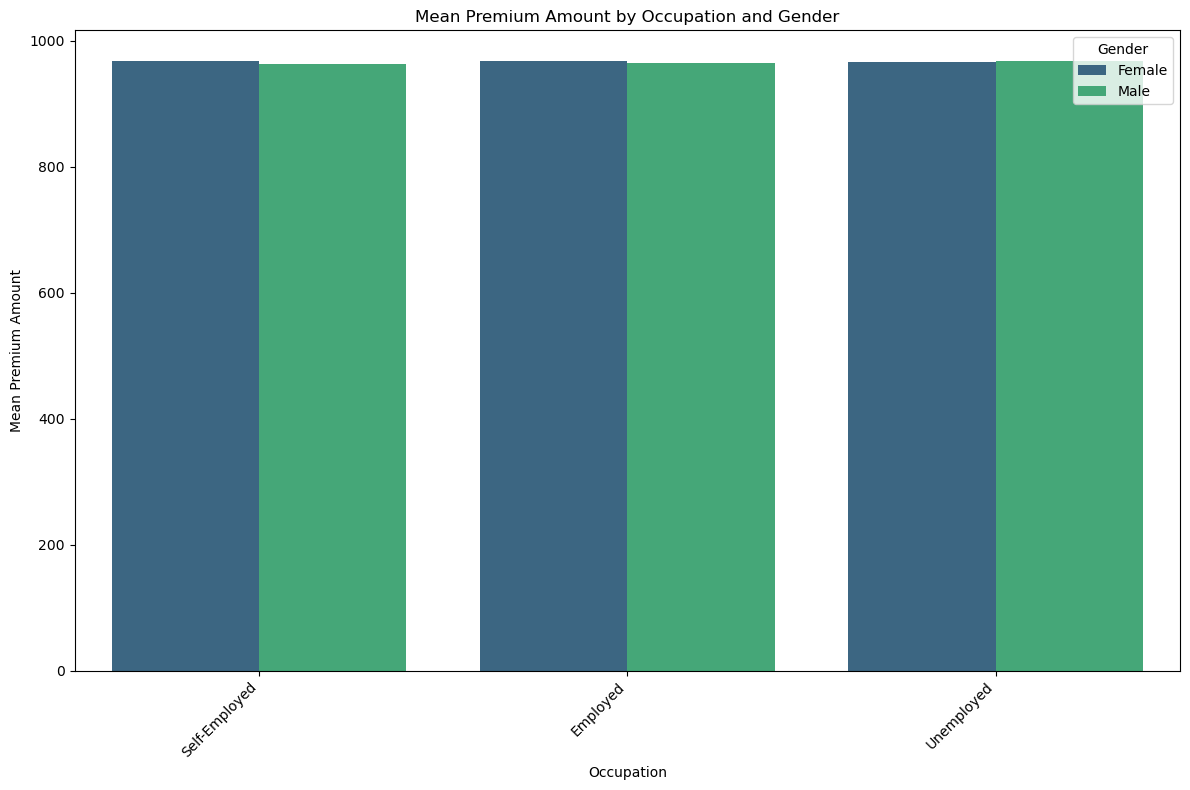

In [31]:
plt.figure(figsize=(12, 8)) # Adjust figure size as needed

sns.barplot(
    data=premium_by_gender_occupation,
    x='Occupation',
    y='mean_premium',
    hue='Gender', # This creates separate bars for Male/Female
    palette='viridis' # Choose a color palette
)

plt.title('Mean Premium Amount by Occupation and Gender')
plt.xlabel('Occupation')
plt.ylabel('Mean Premium Amount')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they overlap
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

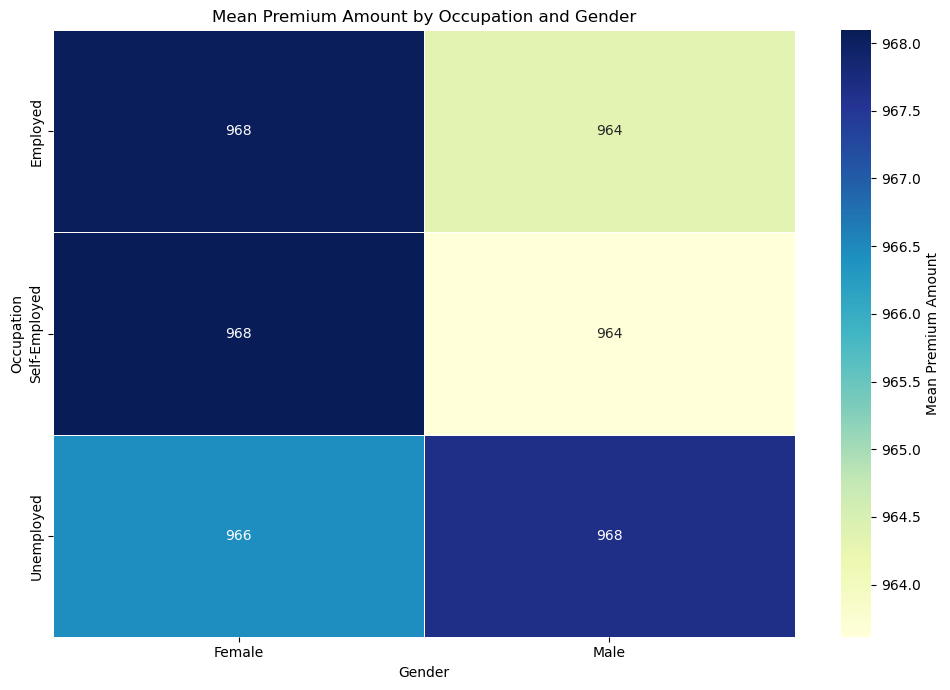

In [32]:
plt.figure(figsize=(10, 7))

# Pivot the table for the heatmap
# Rows: Occupation, Columns: Gender, Values: Mean Premium
heatmap_data_gender_occ = premium_by_gender_occupation.pivot_table(
    index='Occupation',
    columns='Gender',
    values='mean_premium'
)

sns.heatmap(
    heatmap_data_gender_occ,
    annot=True,     # Show the numerical values on the heatmap
    fmt=".0f",      # Format annotations as integers (0 decimal places)
    cmap="YlGnBu", # Choose a color map
    linewidths=.5,  # Add lines between cells
    cbar_kws={'label': 'Mean Premium Amount'}
)
plt.title('Mean Premium Amount by Occupation and Gender')
plt.xlabel('Gender')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()


In [33]:
# Multivariate Analysis Example: Premium Amount vs. Annual Income Log and Age (with few feature engineering)

# --- Binning 'Annual Income Log' and 'Age' ---

# 1. Bin 'Annual Income Log'
# You can choose the number of bins or define custom bins.
# pd.qcut is good for skewed data as it tries to put an equal number of observations in each bin.
print("\n--- Binning Annual Income Log ---")
df_skl['Annual Income Log Bin'] = pd.qcut(df_skl['Annual Income Log'], q=5, labels=[f'Q{i+1}' for i in range(5)], duplicates='drop')
# 'duplicates='drop'' handles cases where there aren't enough unique values for the requested number of quantiles.
print(df_skl['Annual Income Log Bin'].value_counts().sort_index())
#Q3>Q2>Q1>Q5>Q4


--- Binning Annual Income Log ---
Annual Income Log Bin
Q1    55772
Q2    55773
Q3    55774
Q4    55770
Q5    55771
Name: count, dtype: int64


In [34]:
# Check min/max of original Age column relative to bins
min_age = df_skl['Age'].min()
max_age = df_skl['Age'].max()
print(f"Minimum Age in dataset: {min_age}")
print(f"Maximum Age in dataset: {max_age}")


Minimum Age in dataset: 18.0
Maximum Age in dataset: 64.0


In [35]:
# 2. Bin 'Age'
# we can define custom age ranges or use pd.cut for equal-width bins.
print("\n--- Binning Age ---")
age_bins = [0, 18, 25, 35, 45, 55, 65, 100] # Example age ranges
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64','65+']
df_skl['Age Bin'] = pd.cut(df_skl['Age'], bins=age_bins, labels=age_labels, right=False)
print(df_skl['Age Bin'].value_counts().sort_index())



--- Binning Age ---
Age Bin
<18          0
18-24    40540
25-34    58508
35-44    62982
45-54    58408
55-64    58422
65+          0
Name: count, dtype: int64


In [36]:
df_skl.isnull().sum()

Age                      0
Gender                   0
Marital Status           0
Number of Dependents     0
Education Level          0
Occupation               0
Health Score             0
Location                 0
Policy Type              0
Vehicle Age              0
Credit Score             0
Insurance Duration       0
Premium Amount           0
Policy Start Date        0
Customer Feedback        0
Smoking Status           0
Exercise Frequency       0
Property Type            0
Annual Income Log        0
Previous Claims Log      0
Annual Income Log Bin    0
Age Bin                  0
dtype: int64

In [37]:
# --- Grouping by Binned 'Annual Income Log' and 'Age' ---
print("\n--- Premium Amount by Annual Income Log Bin and Age Bin ---")
premium_by_income_age_bin = df_skl.groupby(['Annual Income Log Bin', 'Age Bin'])['Premium Amount'].agg(
    mean_premium='mean',
    median_premium='median',
    min_premium='min',
    max_premium='max',
    count='count'
).sort_values(by='mean_premium', ascending=False).reset_index().dropna()

print(premium_by_income_age_bin)



--- Premium Amount by Annual Income Log Bin and Age Bin ---
   Annual Income Log Bin Age Bin  mean_premium  median_premium  min_premium  \
0                     Q2   35-44    989.782441           707.0          0.0   
1                     Q3   25-34    978.252415           693.0          0.0   
2                     Q3   55-64    974.992144           688.0          0.0   
3                     Q4   35-44    974.211608           688.0          0.0   
4                     Q5   45-54    973.627933           691.0          0.0   
5                     Q5   35-44    970.536873           701.0          0.0   
6                     Q1   45-54    969.653922           694.0          0.0   
7                     Q1   25-34    969.341555           688.0          0.0   
8                     Q1   55-64    967.235081           688.0          0.0   
9                     Q1   35-44    966.251975           688.0          0.0   
10                    Q2   55-64    964.689361           688.0        

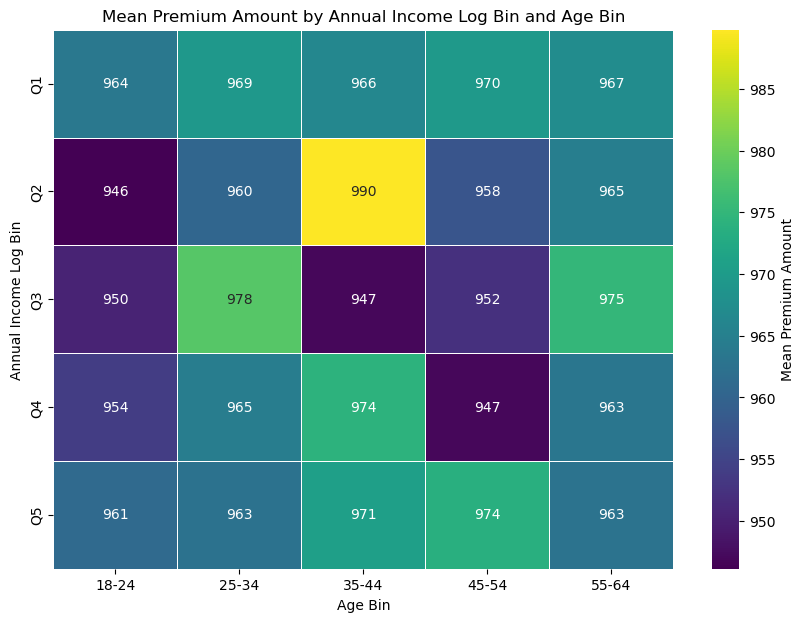

In [38]:
plt.figure(figsize=(10, 7))

# Pivot the table for the heatmap
# Rows: Income Bins, Columns: Age Bins, Values: Mean Premium
heatmap_data = premium_by_income_age_bin.pivot_table(
    index='Annual Income Log Bin',
    columns='Age Bin',
    values='mean_premium'
)

# Plot the heatmap
sns.heatmap(
    heatmap_data,
    annot=True,     # Show the numerical values on the heatmap
    fmt=".0f",      # Format annotations as integers (0 decimal places)
    cmap="viridis", # Color map (e.g., "YlGnBu", "coolwarm", "plasma")
    linewidths=.5,  # Add lines between cells
    cbar_kws={'label': 'Mean Premium Amount'} # Label for the color bar
)
plt.title('Mean Premium Amount by Annual Income Log Bin and Age Bin')
plt.xlabel('Age Bin')
plt.ylabel('Annual Income Log Bin')
plt.show()

C:\Users\USER\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USER\AppData\Local\Temp\ipykernel_9544\2397541034.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent suptitle overlap


<Figure size 1500x800 with 0 Axes>

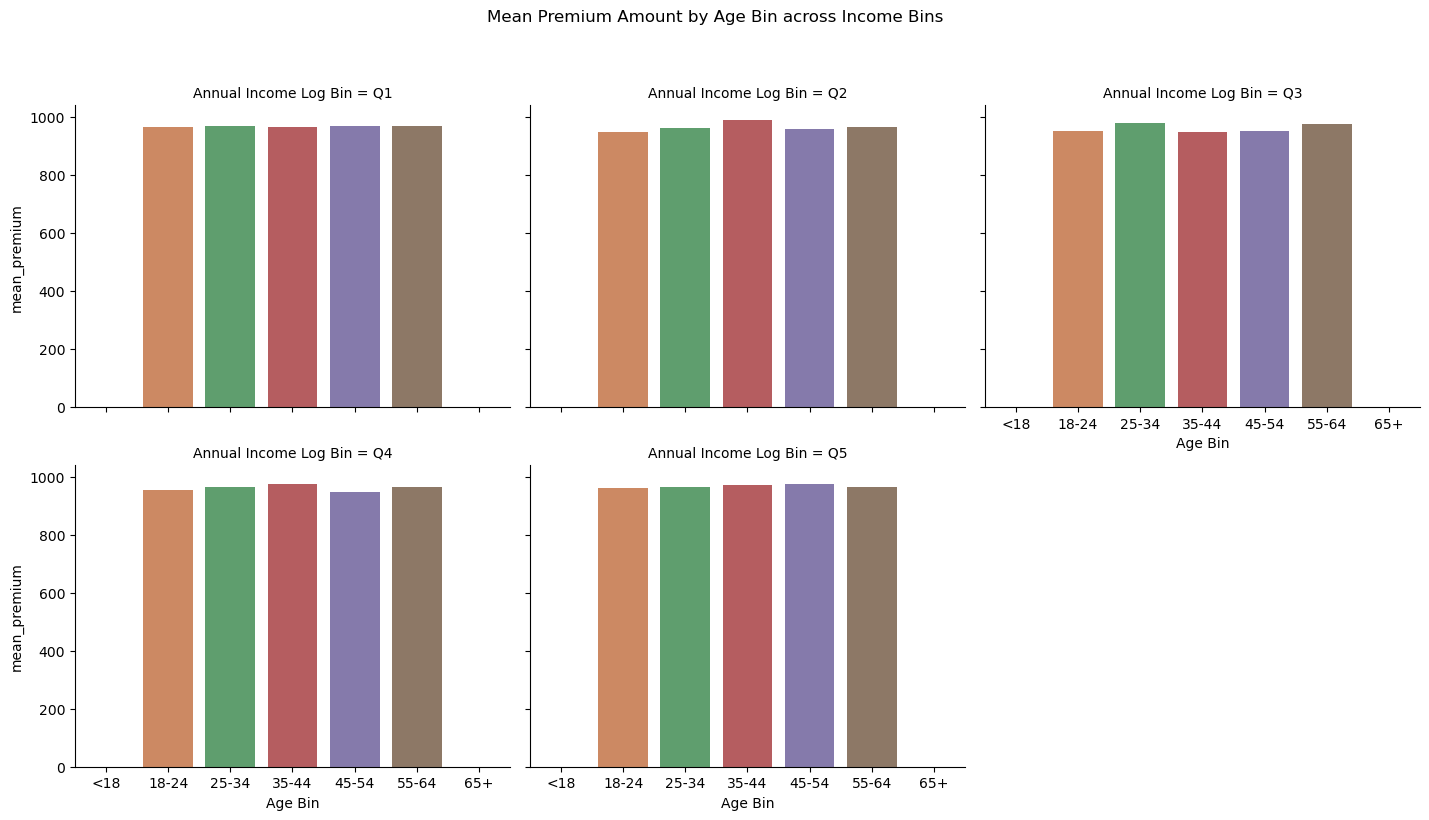

In [39]:
#Q3>Q2>Q1>Q5>Q4

plt.figure(figsize=(15, 8))
sns.catplot(
    data = premium_by_income_age_bin,
    x='Age Bin',
    y='mean_premium',
    col='Annual Income Log Bin', # Creates separate plots for each income bin
    kind='bar',
    col_wrap=3, # Wrap columns after 3 plots
    height=4, aspect=1.2,
    palette='deep',
    errorbar=None # Use this if you only have mean and no error information from aggregation
)
plt.suptitle('Mean Premium Amount by Age Bin across Income Bins', y=1.02) # Adjust suptitle position
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.show()

C:\Users\USER\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USER\AppData\Local\Temp\ipykernel_9544\1704768318.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.98])


<Figure size 1500x800 with 0 Axes>

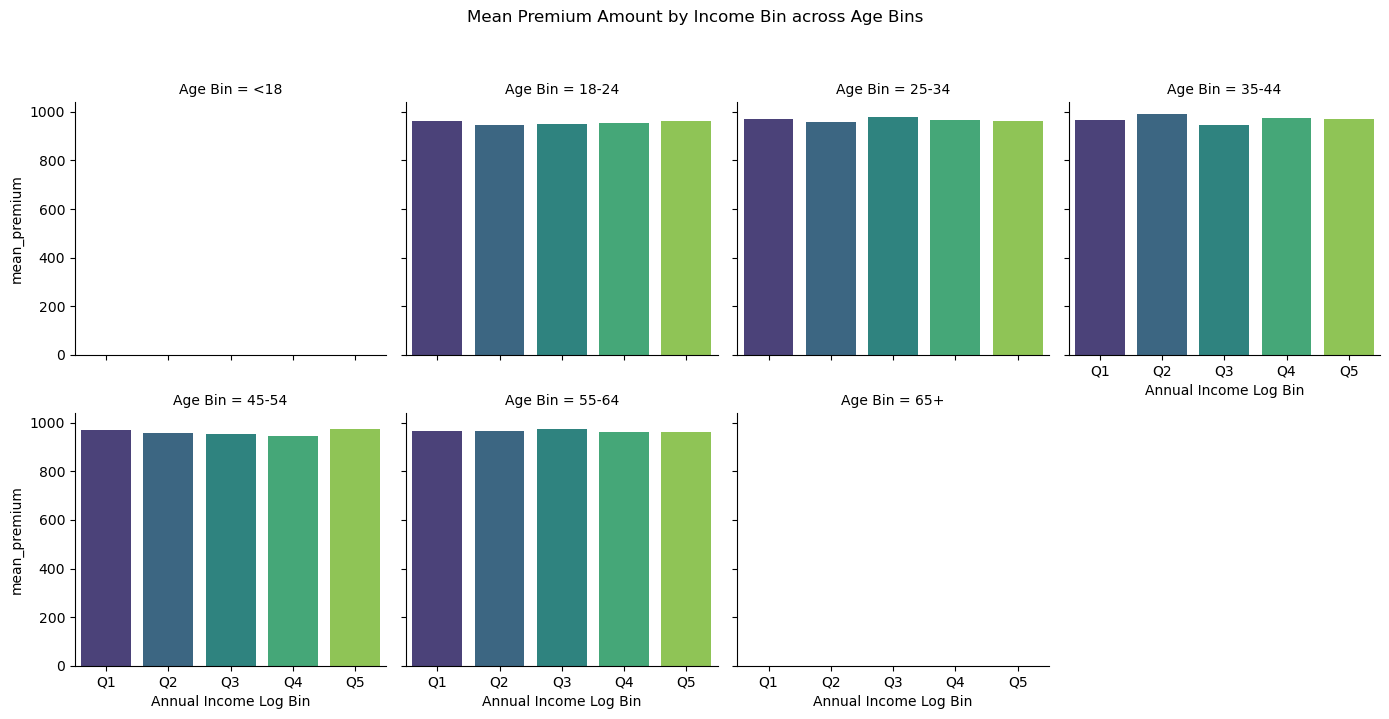

In [40]:
plt.figure(figsize=(15, 8))
sns.catplot(
    data=premium_by_income_age_bin,
    x='Annual Income Log Bin',
    y='mean_premium',
    col='Age Bin', # Creates separate plots for each age bin
    kind='bar',
    col_wrap=4, # Adjust as needed based on number of age bins
    height=3.5, aspect=1.0,
    palette='viridis',
    errorbar=None
)
plt.suptitle('Mean Premium Amount by Income Bin across Age Bins', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

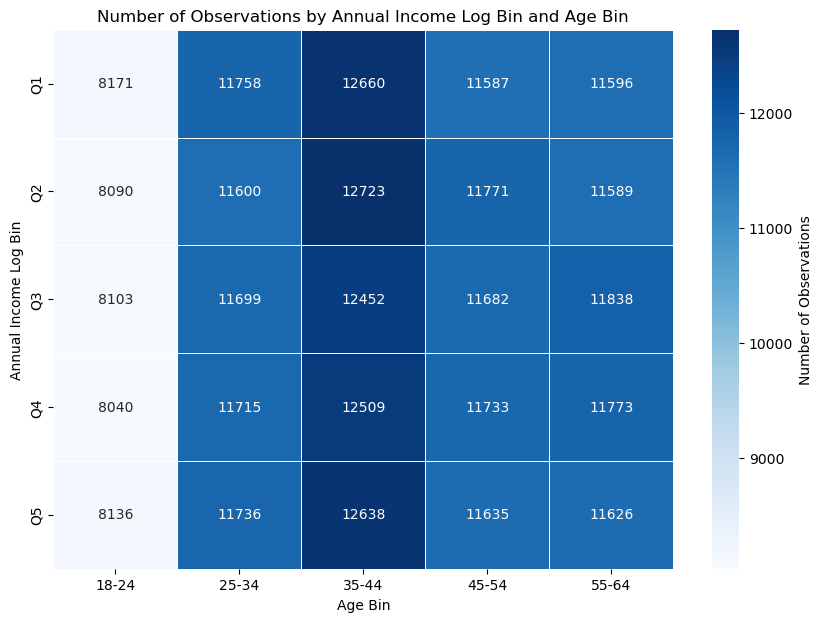

In [41]:
plt.figure(figsize=(10, 7))

# Pivot the table for the heatmap of counts
heatmap_count_data = premium_by_income_age_bin.pivot_table(
    index='Annual Income Log Bin',
    columns='Age Bin',
    values='count'
)

sns.heatmap(
    heatmap_count_data,
    annot=True,
    fmt=".0f",
    cmap="Blues", # Use a different colormap for counts
    linewidths=.5,
    cbar_kws={'label': 'Number of Observations'}
)
plt.title('Number of Observations by Annual Income Log Bin and Age Bin')
plt.xlabel('Age Bin')
plt.ylabel('Annual Income Log Bin')
plt.show()

In [42]:
#### Feature  Engineering

In [43]:
#Checking for high and low cardinality categorical features
df_skl.select_dtypes("object").nunique()

Gender                2
Marital Status        3
Education Level       4
Occupation            3
Location              3
Policy Type           3
Customer Feedback     3
Smoking Status        2
Exercise Frequency    4
Property Type         3
dtype: int64

In [44]:
df_skl['Education Level'].unique()

array(["Master's", "Bachelor's", 'PhD', 'High School'], dtype=object)

In [45]:
df_skl['Smoking Status'].unique()

array(['Yes', 'No'], dtype=object)

In [46]:
df_skl['Exercise Frequency'].unique()

array(['Daily', 'Monthly', 'Rarely', 'Weekly'], dtype=object)

In [47]:
# --- 2. Define Custom Mapping Dictionaries ---
# Create dictionaries where keys are the category strings and values are the desired numerical order.
# Starting from 0 or 1.

# Example mapping for 'Education Level' 
education_mapping = {
     # Assuming this is the lowest level
    'High School': 0,
    "Bachelor's": 1,
    "Master's": 2,
    'PhD': 3
}
if 'Education Level' in df_skl.columns:
    df_skl['Education Level Encoded'] = df_skl['Education Level'].map(education_mapping)
# Example mapping for 'Exercise Frequency'
exercise_mapping = {
    'Rarely': 0,
    'Monthly': 1,
    'Weekly': 2,
    'Daily': 3,
}
if 'Exercise Frequency' in df_skl.columns:
    df_skl['Exercise Frequency Encoded'] = df_skl['Exercise Frequency'].map(exercise_mapping)
#Example mapping for 'Smoking Status'
smoking_mapping = {'No':0, 'Yes':1}
if 'Smoking Status' in df_skl.columns:
    df_skl['Smoking Status Encoded'] = df_skl['Smoking Status'].map(smoking_mapping)
df_skl.head()
df_skl.drop(['Education Level', 'Exercise Frequency', 'Smoking Status'], axis=1, inplace=True)   

In [48]:
# One-Hot Encoding for nominal features
#nominal_cols = ['Gender', 'Marital Status', 'Policy Type', 'Property Type', 'Occupation', 'Location']
#df_skl = pd.get_dummies(df_skl, columns=nominal_cols, drop_first=True) # drop_first to avoid multicollinearity
#df_skl.head()

In [49]:
nominal_cols = ['Gender', 'Marital Status', 'Policy Type', 'Property Type', 'Occupation', 'Location']
encoder = OneHotEncoder(sparse_output=False)


one_hot_encoded = encoder.fit_transform(df_skl[nominal_cols])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(nominal_cols))

df_encoded = pd.concat([df_skl, one_hot_df], axis=1)
df_encoded = df_encoded.drop(nominal_cols, axis=1)
print(f"Encoded Insurance data : \n{df_encoded}")

Encoded Insurance data : 
         Age  Number of Dependents  Health Score  Vehicle Age  Credit Score  \
0       56.0                   1.0     31.074627           13         320.0   
1       46.0                   1.0     50.271335            3         694.0   
2       32.0                   3.0     14.714909           16         652.0   
3       60.0                   0.0     25.346926           11         330.0   
4       25.0                   0.0      6.659499            9         575.0   
...      ...                   ...           ...          ...           ...   
278855  53.0                   4.0     24.455533            2         500.0   
278856  19.0                   4.0     25.239104           11         558.0   
278857  45.0                   1.0     62.112230           19         751.0   
278858  60.0                   4.0      6.163919           17         457.0   
278859  50.0                   1.0     25.962097           13         797.0   

        Insurance Duratio

In [50]:
df_encoded['Policy Start Date'].sort_values(ascending=False)

273728   2024-08-15 15:21:39.287115
272974   2024-08-15 15:21:39.286113
273175   2024-08-15 15:21:39.286113
273177   2024-08-15 15:21:39.286113
271957   2024-08-15 15:21:39.285112
                    ...            
5271     2019-08-17 15:21:39.082499
4382     2019-08-17 15:21:39.081504
3151     2019-08-17 15:21:39.080440
3254     2019-08-17 15:21:39.080440
2017     2019-08-17 15:21:39.080371
Name: Policy Start Date, Length: 278860, dtype: datetime64[ns]

In [51]:
df_encoded['Age'].nunique()

47

In [52]:
# Inserting New Featres
# Feature: Policy Duration (assuming current date for calculation)
# You might need to define a 'current_date' based on your dataset's last policy date or a reasonable assumption.
current_date = pd.to_datetime('2024-08-15 15:21:39.287115') # Example: using today's date
if 'Policy Start Date' in df_encoded.columns:
    df_encoded['Policy Duration (Years)'] = (current_date - df_encoded['Policy Start Date']).dt.days / 365.25
    df_encoded.drop('Policy Start Date', axis=1, inplace=True) # Drop original date column
# Feature: Age Band




In [53]:
if 'Age' in df_encoded.columns:
    df_encoded['Age Band'] = pd.cut(df_encoded['Age'], bins=[0, 18, 30, 50, 70, 100],
                            labels=['Child', 'Young Adult', 'Adult', 'Senior', 'Elderly'], right=False)
df_encoded

,Age,Number of Dependents,Health Score,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Customer Feedback,Annual Income Log,Previous Claims Log,...,Property Type_Condo,Property Type_House,Occupation_Employed,Occupation_Self-Employed,Occupation_Unemployed,Location_Rural,Location_Suburban,Location_Urban,Policy Duration (Years),Age Band
0,56.0,1.0,31.074627,13,320.0,5,308.0,Poor,11.512835,0.693147,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.681040,Senior
1,46.0,1.0,50.271335,3,694.0,4,517.0,Good,7.961370,0.693147,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.538672,Adult
2,32.0,3.0,14.714909,16,652.0,8,849.0,Poor,10.314106,1.098612,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.720055,Adult
3,60.0,0.0,25.346926,11,330.0,7,927.0,Poor,10.786676,0.693147,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.464750,Senior
4,25.0,0.0,6.659499,9,575.0,8,303.0,Poor,10.899975,0.693147,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.720739,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278855,53.0,4.0,24.455533,2,500.0,8,367.0,Average,10.025484,1.098612,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.302533,Senior
278856,19.0,4.0,25.239104,11,558.0,3,3044.0,Average,10.379473,0.693147,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.752225,Young Adult
278857,45.0,1.0,62.112230,19,751.0,7,1334.0,Poor,6.324359,0.693147,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.564682,Adult
278858,60.0,4.0,6.163919,17,457.0,3,662.0,Average,8.310169,0.693147,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.583162,Senior


In [54]:
df_encoded.isnull().sum()

Age                           0
Number of Dependents          0
Health Score                  0
Vehicle Age                   0
Credit Score                  0
Insurance Duration            0
Premium Amount                0
Customer Feedback             0
Annual Income Log             0
Previous Claims Log           0
Annual Income Log Bin         0
Age Bin                       0
Education Level Encoded       0
Exercise Frequency Encoded    0
Smoking Status Encoded        0
Gender_Female                 0
Gender_Male                   0
Marital Status_Divorced       0
Marital Status_Married        0
Marital Status_Single         0
Policy Type_Basic             0
Policy Type_Comprehensive     0
Policy Type_Premium           0
Property Type_Apartment       0
Property Type_Condo           0
Property Type_House           0
Occupation_Employed           0
Occupation_Self-Employed      0
Occupation_Unemployed         0
Location_Rural                0
Location_Suburban             0
Location

In [55]:
df_encoded.drop(columns=['Annual Income Log Bin', 'Age Bin', 'Age'], axis=1, inplace=True)

In [56]:
df_encoded.shape

(278860, 31)

In [57]:
#Let encode Age Band using OneHot Encoding 
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# sparse_output=False ensures a dense array output
# handle_unknown='ignore' handles new categories in the test data
encoder.fit(df_encoded[['Age Band']])  # Fit on the single feature column
one_hot_encoded = encoder.transform(df_encoded[['Age Band']])
feature_names = encoder.get_feature_names_out(['Age Band'])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=feature_names)
final_df = pd.concat([df_encoded.drop('Age Band', axis=1), one_hot_df], axis=1)
final_df.head()

,Number of Dependents,Health Score,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Customer Feedback,Annual Income Log,Previous Claims Log,Education Level Encoded,...,Occupation_Employed,Occupation_Self-Employed,Occupation_Unemployed,Location_Rural,Location_Suburban,Location_Urban,Policy Duration (Years),Age Band_Adult,Age Band_Senior,Age Band_Young Adult
0,1.0,31.074627,13,320.0,5,308.0,Poor,11.512835,0.693147,2,...,0.0,1.0,0.0,0.0,0.0,1.0,1.681040,0.0,1.0,0.0
1,1.0,50.271335,3,694.0,4,517.0,Good,7.961370,0.693147,1,...,0.0,1.0,0.0,0.0,0.0,1.0,1.538672,1.0,0.0,0.0
2,3.0,14.714909,16,652.0,8,849.0,Poor,10.314106,1.098612,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.720055,1.0,0.0,0.0
3,0.0,25.346926,11,330.0,7,927.0,Poor,10.786676,0.693147,3,...,0.0,1.0,0.0,1.0,0.0,0.0,1.464750,0.0,1.0,0.0
4,0.0,6.659499,9,575.0,8,303.0,Poor,10.899975,0.693147,0,...,0.0,1.0,0.0,0.0,0.0,1.0,3.720739,0.0,0.0,1.0


In [58]:
# Feature: Income per Dependent (handle potential division by zero)
if 'Annual Income Log' in final_df.columns and 'Number of Dependents' in final_df.columns:
    # Calculate 'Income per Dependent' using the transformed income
    # Add 1 to 'Number of Dependents' to avoid division by zero.
    # This also naturally scales income by (self + dependents).
    final_df['Income per Dependent'] = final_df['Annual Income Log'] / (final_df['Number of Dependents'] + 1)
    

In [59]:
#Creating interaction features between 'Age Band' and 'Smoking Status Encoded'

# --- Step 1: Identify all one-hot encoded 'Age Band' columns ---
# This finds all columns that start with the prefix 'Age Band_'
age_band_encoded_cols = [col for col in final_df.columns if col.startswith('Age Band_')]
# --- Step 2: Define the 'Smoking Status Encoded' column name ---
smoking_status_col_name = 'Smoking Status Encoded'
# --- Step 3: Create interaction features by multiplying ---
for age_col in age_band_encoded_cols:
    # Construct a descriptive new column name
    # Replace spaces in smoking_status_col_name for cleaner new column names
    Age_Smoking_Status = f"{age_col}_x_{smoking_status_col_name.replace(' ', '_')}"
    # Perform the element-wise multiplication
    final_df[Age_Smoking_Status] = final_df[age_col] * final_df[smoking_status_col_name]
    print(f"  - Created '{Age_Smoking_Status}'")


  - Created 'Age Band_Adult_x_Smoking_Status_Encoded'
  - Created 'Age Band_Senior_x_Smoking_Status_Encoded'
  - Created 'Age Band_Young Adult_x_Smoking_Status_Encoded'


In [60]:
final_df.head()

,Number of Dependents,Health Score,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Customer Feedback,Annual Income Log,Previous Claims Log,Education Level Encoded,...,Location_Suburban,Location_Urban,Policy Duration (Years),Age Band_Adult,Age Band_Senior,Age Band_Young Adult,Income per Dependent,Age Band_Adult_x_Smoking_Status_Encoded,Age Band_Senior_x_Smoking_Status_Encoded,Age Band_Young Adult_x_Smoking_Status_Encoded
0,1.0,31.074627,13,320.0,5,308.0,Poor,11.512835,0.693147,2,...,0.0,1.0,1.681040,0.0,1.0,0.0,5.756418,0.0,1.0,0.0
1,1.0,50.271335,3,694.0,4,517.0,Good,7.961370,0.693147,1,...,0.0,1.0,1.538672,1.0,0.0,0.0,3.980685,1.0,0.0,0.0
2,3.0,14.714909,16,652.0,8,849.0,Poor,10.314106,1.098612,1,...,1.0,0.0,0.720055,1.0,0.0,0.0,2.578527,0.0,0.0,0.0
3,0.0,25.346926,11,330.0,7,927.0,Poor,10.786676,0.693147,3,...,0.0,0.0,1.464750,0.0,1.0,0.0,10.786676,0.0,0.0,0.0
4,0.0,6.659499,9,575.0,8,303.0,Poor,10.899975,0.693147,0,...,0.0,1.0,3.720739,0.0,0.0,1.0,10.899975,0.0,0.0,0.0


In [61]:
#pip install textblob

In [62]:
# For Customer Feedback (if needed)

final_df['Customer Sentiment Score'] = final_df['Customer Feedback'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
final_df.drop('Customer Feedback', axis=1, inplace=True)
final_df.head()

,Number of Dependents,Health Score,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Annual Income Log,Previous Claims Log,Education Level Encoded,Exercise Frequency Encoded,...,Location_Urban,Policy Duration (Years),Age Band_Adult,Age Band_Senior,Age Band_Young Adult,Income per Dependent,Age Band_Adult_x_Smoking_Status_Encoded,Age Band_Senior_x_Smoking_Status_Encoded,Age Band_Young Adult_x_Smoking_Status_Encoded,Customer Sentiment Score
0,1.0,31.074627,13,320.0,5,308.0,11.512835,0.693147,2,3,...,1.0,1.681040,0.0,1.0,0.0,5.756418,0.0,1.0,0.0,-0.4
1,1.0,50.271335,3,694.0,4,517.0,7.961370,0.693147,1,1,...,1.0,1.538672,1.0,0.0,0.0,3.980685,1.0,0.0,0.0,0.7
2,3.0,14.714909,16,652.0,8,849.0,10.314106,1.098612,1,1,...,0.0,0.720055,1.0,0.0,0.0,2.578527,0.0,0.0,0.0,-0.4
3,0.0,25.346926,11,330.0,7,927.0,10.786676,0.693147,3,0,...,0.0,1.464750,0.0,1.0,0.0,10.786676,0.0,0.0,0.0,-0.4
4,0.0,6.659499,9,575.0,8,303.0,10.899975,0.693147,0,0,...,1.0,3.720739,0.0,0.0,1.0,10.899975,0.0,0.0,0.0,-0.4


In [63]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform( final_df)
scaled_df = pd.DataFrame(scaled_data,
                         columns= final_df.columns)
scaled_df.head()

,Number of Dependents,Health Score,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Annual Income Log,Previous Claims Log,Education Level Encoded,Exercise Frequency Encoded,...,Location_Urban,Policy Duration (Years),Age Band_Adult,Age Band_Senior,Age Band_Young Adult,Income per Dependent,Age Band_Adult_x_Smoking_Status_Encoded,Age Band_Senior_x_Smoking_Status_Encoded,Age Band_Young Adult_x_Smoking_Status_Encoded,Customer Sentiment Score
0,-0.745050,0.164147,0.603290,-1.688930,-0.003008,-0.723834,1.132491,0.205866,0.443977,1.342996,...,1.416892,-0.565238,-0.879669,1.477131,-0.576550,0.431660,-0.529019,2.314632,-0.377577,-0.953848
1,-0.745050,1.389585,-1.130442,0.793758,-0.390403,-0.493321,-1.825469,0.205866,-0.451265,-0.446938,...,1.416892,-0.663959,1.136792,-0.676988,-0.576550,-0.183751,1.890291,-0.432034,-0.377577,1.449938
2,0.747672,-0.880189,1.123409,0.514953,1.159178,-0.127149,0.134088,1.181476,-0.451265,-0.446938,...,-0.705770,-1.231607,1.136792,-0.676988,-0.576550,-0.669693,-0.529019,-0.432034,-0.377577,-0.953848
3,-1.491411,-0.201485,0.256543,-1.622548,0.771783,-0.041120,0.527685,0.205866,1.339220,-1.341904,...,-0.705770,-0.715218,-0.879669,1.477131,-0.576550,2.174982,-0.529019,-0.432034,-0.377577,-0.953848
4,-1.491411,-1.394413,-0.090203,0.003811,1.159178,-0.729348,0.622049,0.205866,-1.346508,-1.341904,...,1.416892,0.849134,-0.879669,-0.676988,1.734456,2.214248,-0.529019,-0.432034,-0.377577,-0.953848


In [64]:
###                              (D) Model Development

In [65]:
# Define features (X) and target (y)
X = scaled_df.drop('Premium Amount', axis=1)
y = scaled_df['Premium Amount']

# Drop any remaining non-numeric or high-cardinality categorical columns that were not encoded/handled
X = X.select_dtypes(include=np.number) # Keep only numerical columns for now, after encoding

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (223088, 36), (223088,)
Testing set shape: (55772, 36), (55772,)


In [66]:
### Let's instantiate our models using Dictionary 

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'XGBoost Regressor': XGBRegressor(random_state=42, n_jobs=-1),
    'LightGBM Regressor': LGBMRegressor(random_state=42, n_jobs=-1)
}

results = {}



for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}
    print(f"{name} Metrics:")
    print(f"  MAE: {mae:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R^2: {r2:.4f}")

# Convert results to a DataFrame for easy comparison
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.sort_values(by='R2', ascending=False))


Training Linear Regression...
Linear Regression Metrics:
  MAE: 0.7657
  MSE: 0.9971
  RMSE: 0.9986
  R^2: -0.0004

Training Ridge Regression...
Ridge Regression Metrics:
  MAE: 0.7658
  MSE: 0.9970
  RMSE: 0.9985
  R^2: -0.0002

Training Lasso Regression...
Lasso Regression Metrics:
  MAE: 0.7657
  MSE: 0.9968
  RMSE: 0.9984
  R^2: -0.0000

Training Decision Tree Regressor...
Decision Tree Regressor Metrics:
  MAE: 1.0827
  MSE: 2.1611
  RMSE: 1.4701
  R^2: -1.1681

Training Random Forest Regressor...
Random Forest Regressor Metrics:
  MAE: 0.7959
  MSE: 1.0255
  RMSE: 1.0127
  R^2: -0.0288

Training Gradient Boosting Regressor...
Gradient Boosting Regressor Metrics:
  MAE: 0.7658
  MSE: 0.9971
  RMSE: 0.9985
  R^2: -0.0003

Training XGBoost Regressor...
XGBoost Regressor Metrics:
  MAE: 0.7705
  MSE: 1.0113
  RMSE: 1.0056
  R^2: -0.0146

Training LightGBM Regressor...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-

In [ ]:
print("\n--- Starting Hyperparameter Tuning for Gradient Boosting Regressor ---")

# Initialize the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Define the parameter distribution for RandomizedSearchCV
# We use scipy.stats.randint for integer parameters and scipy.stats.uniform for float parameters.
gb_param_dist = {
    'n_estimators': randint(100, 600),          # Number of boosting stages (trees). Range: [100, 599]
    'learning_rate': uniform(0.01, 0.2),        # Step size shrinkage. Range: [0.01, 0.21]
    'max_depth': randint(3, 15),                # Maximum depth of the individual regression estimators. Range: [3, 14]
    'subsample': uniform(0.6, 0.4),             # Fraction of samples to be used for fitting the individual base learners. Range: [0.6, 1.0]
    'max_features': ['sqrt', 'log2', 0.6, 0.8, 1.0], # Number of features to consider when looking for the best split.
                                                    # Can be 'sqrt', 'log2', or a float (fraction of features)
    'min_samples_split': randint(2, 20),        # Minimum number of samples required to split an internal node. Range: [2, 19]
    'min_samples_leaf': randint(1, 10),         # Minimum number of samples required to be at a leaf node. Range: [1, 9]
    'alpha': uniform(0.8, 0.2)                  # The alpha-quantile of the Huber loss function. Only for 'huber' loss.
                                                # If using default 'ls' (least squares) loss, this parameter has no effect.
                                                # You might remove it if you're not planning to change the loss function.
}

# Set up RandomizedSearchCV
# n_iter: Number of parameter settings that are sampled. Higher means more exhaustive search.
# cv: Number of folds for cross-validation.
# scoring: Metric to optimize. 'r2' is common for regression (maximizes R-squared).
# n_jobs: Number of CPU cores to use. -1 means use all available cores.
# verbose: Controls the verbosity: 0 = silent, 1 = progress bar, 2 = all messages.
# random_state: For reproducibility of the random sampling.
gb_random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=gb_param_dist,
    n_iter=50, # You can increase this for a more thorough search
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit RandomizedSearchCV to the training data
gb_random_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_gb_model = gb_random_search.best_estimator_
best_gb_params = gb_random_search.best_params_
best_gb_score_cv = gb_random_search.best_score_ # Best R2 score from cross-validation

print(f"\n--- Tuning Results for Gradient Boosting Regressor ---")
print(f"Best Parameters found: {best_gb_params}")
print(f"Best R2 score from cross-validation: {best_gb_score_cv:.4f}")

# Evaluate the best model on the unseen test set
y_pred_gb = best_gb_model.predict(X_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"\n--- Tuned Gradient Boosting Regressor Performance on Test Set ---")
print(f"  MAE: {mae_gb:.4f}")
print(f"  MSE: {mse_gb:.4f}")
print(f"  RMSE: {rmse_gb:.4f}")
print(f"  R^2: {r2_gb:.4f}")

# You can also inspect feature importances from the best model
if hasattr(best_gb_model, 'feature_importances_'):
      feature_importances = pd.Series(best_gb_model.feature_importances_, index=X_train.columns)
      feature_importances = feature_importances.sort_values(ascending=False)
      print("\nTop 10 Feature Importances from Tuned GB Model:")
      print(feature_importances.head(10))